# Social Media Performance Analysis for Business Growth

## Objective:

### Analyze social media data to identify factors affecting engagement, viral posts, and audience interaction to improve marketing strategy.This makes project professional.

## 1.Pandas 
## 2.Numpy
## 3.Matplotlib
## 4.Seaborn

### Business Questions

#### Which content type gets highest engagement?

#### Which topic performs best?

#### What makes post viral?

#### Best posting time?

#### Does sentiment affect engagement?

#### Does hashtag count affect engagement?

#### Which platform best?

In [1]:
import pandas as pd

In [27]:
df=pd.read_csv("social_media_performance.csv")

In [4]:
df.head()

,post_id,platform,content_type,topic,language,region,post_datetime,hashtags,sentiment_score,views,likes,comments,shares,engagement_rate,is_viral
0,1,LinkedIn,article,Technology,UR,BR,2025-04-25 09:47:00,#AI #Innovation #TechTrends #Programming #Codi...,0.76,37781,1202,462,185,0.0490,0
1,2,LinkedIn,poll,Health,FR,JP,2025-10-29 09:44:00,#Fitness #Nutrition #Wellness #Health #MentalH...,0.46,23541,1399,538,215,0.0915,1
2,3,LinkedIn,article,Travel,HI,FR,2025-02-10 14:12:00,#Travel #Journey #Adventure #Tourism #ExploreM...,-0.01,30714,1663,639,255,0.0833,1
3,4,LinkedIn,image,Sports,DE,DE,2025-04-18 22:41:00,#Cricket #Workout #Fitness,0.55,31294,1372,528,211,0.0675,0
4,5,LinkedIn,poll,Business,DE,US,2025-04-28 10:17:00,#Entrepreneur #Leadership #StartupLife,0.70,43129,2234,859,343,0.0797,0


In [5]:
df.shape

(10000, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   post_id          10000 non-null  int64  
 1   platform         10000 non-null  object 
 2   content_type     10000 non-null  object 
 3   topic            10000 non-null  object 
 4   language         10000 non-null  object 
 5   region           10000 non-null  object 
 6   post_datetime    10000 non-null  object 
 7   hashtags         10000 non-null  object 
 8   sentiment_score  10000 non-null  float64
 9   views            10000 non-null  int64  
 10  likes            10000 non-null  int64  
 11  comments         10000 non-null  int64  
 12  shares           10000 non-null  int64  
 13  engagement_rate  10000 non-null  float64
 14  is_viral         10000 non-null  int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 1.1+ MB


In [7]:
df.columns

Index(['post_id', 'platform', 'content_type', 'topic', 'language', 'region',
       'post_datetime', 'hashtags', 'sentiment_score', 'views', 'likes',
       'comments', 'shares', 'engagement_rate', 'is_viral'],
      dtype='object')

In [8]:
# for checking null values and sum of null 
df.isnull().sum()

post_id            0
platform           0
content_type       0
topic              0
language           0
region             0
post_datetime      0
hashtags           0
sentiment_score    0
views              0
likes              0
comments           0
shares             0
engagement_rate    0
is_viral           0
dtype: int64

##### there is no null value is avilable here

In [9]:
# CHECK DUPLICATES values
df.duplicated().sum()

np.int64(0)

##### No duplicate Values found in dataset 

In [11]:
# FIX DATA TYPES
df['post_datetime']=pd.to_datetime(df['post_datetime'])

In [14]:
df['post_datetime'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: post_datetime
Non-Null Count  Dtype         
--------------  -----         
10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 78.3 KB


##### converted post_datetime data object type to datetime 

In [15]:
#Extract hour column
df['hour']=df['post_datetime'].dt.hour

In [16]:
df.head(2)

,post_id,platform,content_type,topic,language,region,post_datetime,hashtags,sentiment_score,views,likes,comments,shares,engagement_rate,is_viral,hour
0,1,LinkedIn,article,Technology,UR,BR,2025-04-25 09:47:00,#AI #Innovation #TechTrends #Programming #Codi...,0.76,37781,1202,462,185,0.0490,0,9
1,2,LinkedIn,poll,Health,FR,JP,2025-10-29 09:44:00,#Fitness #Nutrition #Wellness #Health #MentalH...,0.46,23541,1399,538,215,0.0915,1,9


##### added new hour column

In [17]:
#Extract day new column
df['day']=df['post_datetime'].dt.day_name()

In [18]:
df[['day','hour']]

,day,hour
0,Friday,9
1,Wednesday,9
2,Monday,14
3,Friday,22
4,Monday,10
...,...,...
9995,Saturday,19
9996,Saturday,20
9997,Tuesday,20
9998,Sunday,19


##### added new day column

In [19]:
df['hashtag_count']=df['hashtags'].str.count("#")

In [21]:
df[['hashtag_count']]

,hashtag_count
0,7
1,6
2,6
3,3
4,3
...,...
9995,6
9996,6
9997,3
9998,6


##### added hashtag_count column

In [22]:
df.head()

,post_id,platform,content_type,topic,language,region,post_datetime,hashtags,sentiment_score,views,likes,comments,shares,engagement_rate,is_viral,hour,day,hashtag_count
0,1,LinkedIn,article,Technology,UR,BR,2025-04-25 09:47:00,#AI #Innovation #TechTrends #Programming #Codi...,0.76,37781,1202,462,185,0.0490,0,9,Friday,7
1,2,LinkedIn,poll,Health,FR,JP,2025-10-29 09:44:00,#Fitness #Nutrition #Wellness #Health #MentalH...,0.46,23541,1399,538,215,0.0915,1,9,Wednesday,6
2,3,LinkedIn,article,Travel,HI,FR,2025-02-10 14:12:00,#Travel #Journey #Adventure #Tourism #ExploreM...,-0.01,30714,1663,639,255,0.0833,1,14,Monday,6
3,4,LinkedIn,image,Sports,DE,DE,2025-04-18 22:41:00,#Cricket #Workout #Fitness,0.55,31294,1372,528,211,0.0675,0,22,Friday,3
4,5,LinkedIn,poll,Business,DE,US,2025-04-28 10:17:00,#Entrepreneur #Leadership #StartupLife,0.70,43129,2234,859,343,0.0797,0,10,Monday,3


In [23]:
df.sample(30)

,post_id,platform,content_type,topic,language,region,post_datetime,hashtags,sentiment_score,views,likes,comments,shares,engagement_rate,is_viral,hour,day,hashtag_count
7180,7181,Medium,article,Technology,JA,CA,2025-01-29 09:51:00,#MachineLearning #TechTrends #DataScience #Cod...,0.70,77418,11381,4377,1751,0.2262,1,9,Wednesday,6
5774,5775,Medium,story,Health,DE,CA,2025-12-25 09:47:00,#HealthTips #Wellness #Health #Fitness #Nutrit...,0.81,92744,3786,1456,582,0.0628,0,9,Thursday,6
1978,1979,LinkedIn,article,Health,PT,MX,2025-04-12 10:26:00,#MentalHealth #Health #Wellness #Nutrition #Fi...,0.42,12059,861,331,132,0.1100,1,10,Saturday,6
7650,7651,YouTube,video,Business,PT,CA,2025-11-05 20:01:00,#StartupLife #Hustle #CareerGrowth #Leadership...,0.17,454471,40411,15542,6217,0.1368,1,20,Wednesday,6
6540,6541,Medium,story,Entertainment,HI,MX,2025-10-31 10:07:00,#MovieTime #FollowForMore #Funny #Entertainmen...,0.56,43790,5159,1984,793,0.1813,1,10,Friday,5
8176,8177,YouTube,video,Health,ES,JP,2025-05-24 20:32:00,#Nutrition #Health #Fitness #Wellness,0.48,23342,2458,945,378,0.1621,1,20,Saturday,4
4861,4862,Instagram,reel,Lifestyle,PT,AU,2025-02-20 18:58:00,#DailyLife #Wellness #MindfulLiving,0.98,450216,84897,32653,13061,0.2901,1,18,Thursday,3
1464,1465,LinkedIn,article,Health,PT,CA,2025-11-23 14:57:00,#HealthTips #Nutrition #MentalHealth #Health,0.84,26461,1144,440,176,0.0666,0,14,Sunday,4
2370,2371,LinkedIn,carousel,Sports,DE,US,2025-05-31 14:52:00,#Cricket #Workout #Training #Sports #Basketbal...,0.49,23453,1196,460,184,0.0785,0,14,Saturday,7
8422,8423,YouTube,video,Business,ES,AU,2025-07-22 20:19:00,#Hustle #CareerGrowth #BusinessTips #Entrepren...,0.71,935867,71505,27502,11000,0.1175,1,20,Tuesday,6


In [24]:
df.describe()

,post_id,post_datetime,sentiment_score,views,likes,comments,shares,engagement_rate,is_viral,hour,hashtag_count
count,10000.00000,10000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2025-06-30 16:35:54.384000,0.440221,212142.158100,15236.87470,5860.139600,2343.759700,0.112667,0.545700,13.798000,5.115600
min,1.00000,2025-01-01 00:38:00,-1.000000,116.000000,3.00000,1.000000,0.000000,0.008300,0.000000,0.000000,3.000000
25%,2500.75000,2025-03-31 17:29:45,0.160000,30936.500000,1623.00000,624.000000,249.000000,0.061900,0.000000,9.000000,4.000000
50%,5000.50000,2025-06-30 17:09:30,0.560000,78193.000000,5504.00000,2116.500000,846.500000,0.102000,1.000000,14.000000,6.000000
75%,7500.25000,2025-09-30 09:29:00,0.780000,343206.750000,21467.25000,8256.250000,3302.500000,0.151925,1.000000,19.000000,6.000000
max,10000.00000,2025-12-31 23:02:00,1.000000,999022.000000,116255.00000,44713.000000,17885.000000,0.300000,1.000000,23.000000,7.000000
std,2886.89568,NaN,0.452148,254526.880805,20450.03532,7865.396933,3146.163176,0.064301,0.497932,5.992344,1.271062


In [30]:
df.shape

(10000, 18)

In [31]:
df.head()

,post_id,platform,content_type,topic,language,region,post_datetime,hashtags,sentiment_score,views,likes,comments,shares,engagement_rate,is_viral,hour,day,hashtag_count
0,1,LinkedIn,article,Technology,UR,BR,2025-04-25 09:47:00,#AI #Innovation #TechTrends #Programming #Codi...,0.76,37781,1202,462,185,0.0490,0,9,Friday,7
1,2,LinkedIn,poll,Health,FR,JP,2025-10-29 09:44:00,#Fitness #Nutrition #Wellness #Health #MentalH...,0.46,23541,1399,538,215,0.0915,1,9,Wednesday,6
2,3,LinkedIn,article,Travel,HI,FR,2025-02-10 14:12:00,#Travel #Journey #Adventure #Tourism #ExploreM...,-0.01,30714,1663,639,255,0.0833,1,14,Monday,6
3,4,LinkedIn,image,Sports,DE,DE,2025-04-18 22:41:00,#Cricket #Workout #Fitness,0.55,31294,1372,528,211,0.0675,0,22,Friday,3
4,5,LinkedIn,poll,Business,DE,US,2025-04-28 10:17:00,#Entrepreneur #Leadership #StartupLife,0.70,43129,2234,859,343,0.0797,0,10,Monday,3


In [32]:
df.columns

Index(['post_id', 'platform', 'content_type', 'topic', 'language', 'region',
       'post_datetime', 'hashtags', 'sentiment_score', 'views', 'likes',
       'comments', 'shares', 'engagement_rate', 'is_viral', 'hour', 'day',
       'hashtag_count'],
      dtype='object')

In [33]:
# ordering columns 
df = df[[
'post_id',
'platform',
'content_type',
'topic',
'language',
'region',

'post_datetime',
'hour',
'day',

'hashtags',
'hashtag_count',

'sentiment_score',

'views',
'likes',
'comments',
'shares',
'engagement_rate',
'is_viral'
]]


##### all columns are ordered column-wise

In [35]:
df.head(5)

,post_id,platform,content_type,topic,language,region,post_datetime,hour,day,hashtags,hashtag_count,sentiment_score,views,likes,comments,shares,engagement_rate,is_viral
0,1,LinkedIn,article,Technology,UR,BR,2025-04-25 09:47:00,9,Friday,#AI #Innovation #TechTrends #Programming #Codi...,7,0.76,37781,1202,462,185,0.0490,0
1,2,LinkedIn,poll,Health,FR,JP,2025-10-29 09:44:00,9,Wednesday,#Fitness #Nutrition #Wellness #Health #MentalH...,6,0.46,23541,1399,538,215,0.0915,1
2,3,LinkedIn,article,Travel,HI,FR,2025-02-10 14:12:00,14,Monday,#Travel #Journey #Adventure #Tourism #ExploreM...,6,-0.01,30714,1663,639,255,0.0833,1
3,4,LinkedIn,image,Sports,DE,DE,2025-04-18 22:41:00,22,Friday,#Cricket #Workout #Fitness,3,0.55,31294,1372,528,211,0.0675,0
4,5,LinkedIn,poll,Business,DE,US,2025-04-28 10:17:00,10,Monday,#Entrepreneur #Leadership #StartupLife,3,0.70,43129,2234,859,343,0.0797,0


### Best content type


In [36]:
df.groupby('content_type')['engagement_rate'].mean()

content_type
article     0.114808
carousel    0.116647
feed        0.152081
image       0.116517
poll        0.078742
reel        0.145252
story       0.138121
video       0.087711
Name: engagement_rate, dtype: float64

### Note- Feed posts and reels generate the highest engagement, so the company should focus more on these content types for better audience interaction and marketing performance

### Best platform

In [37]:
df.groupby('platform')['views'].mean()

platform
Instagram    256789.6748
LinkedIn      25813.3636
Medium        49933.9504
YouTube      516031.6436
Name: views, dtype: float64

### Note-YouTube is the best platform for maximizing reach and visibility, so more content should be focused on YouTube to achieve higher audience engagement and views.

### Viral posts per topic

In [38]:
df.groupby('topic')["is_viral"].sum()

topic
Business         507
Education        531
Entertainment    560
Fashion          557
Food             561
Health           546
Lifestyle        546
Sports           570
Technology       544
Travel           535
Name: is_viral, dtype: int64

### Note - Sports, food, and entertainment content have the highest chances of going viral. Therefore, focusing more on these topics can help increase content virality and audience reach.

### Category frequency

In [41]:
df['platform'].value_counts()

platform
LinkedIn     2500
Instagram    2500
Medium       2500
YouTube      2500
Name: count, dtype: int64

In [42]:
df['content_type'].value_counts()

content_type
video       3007
story       1787
article     1743
image        991
carousel     944
poll         525
reel         508
feed         495
Name: count, dtype: int64

In [43]:
df['topic'].value_counts()

topic
Lifestyle        1043
Travel           1030
Food             1030
Fashion          1025
Health           1021
Sports           1008
Technology        996
Entertainment     987
Education         956
Business          904
Name: count, dtype: int64

### All viral posts

In [46]:
all_viral_posts=df.loc[df["is_viral"]==1]

In [47]:
all_viral_posts

,post_id,platform,content_type,topic,language,region,post_datetime,hour,day,hashtags,hashtag_count,sentiment_score,views,likes,comments,shares,engagement_rate,is_viral
1,2,LinkedIn,poll,Health,FR,JP,2025-10-29 09:44:00,9,Wednesday,#Fitness #Nutrition #Wellness #Health #MentalH...,6,0.46,23541,1399,538,215,0.0915,1
2,3,LinkedIn,article,Travel,HI,FR,2025-02-10 14:12:00,14,Monday,#Travel #Journey #Adventure #Tourism #ExploreM...,6,-0.01,30714,1663,639,255,0.0833,1
5,6,LinkedIn,image,Sports,FR,AU,2025-10-03 15:25:00,15,Friday,#Fitness #Training #Cricket #Basketball #Sports,5,0.23,11016,633,243,97,0.0885,1
6,7,LinkedIn,carousel,Food,HI,FR,2025-07-15 15:16:00,15,Tuesday,#Food #MustTry #Cooking #Recipe #Foodie #FoodBlog,6,0.49,1212,104,40,16,0.1323,1
7,8,LinkedIn,image,Fashion,ES,AU,2025-02-24 09:40:00,9,Monday,#FashionTips #Style #Lookbook #TrendingStyle #...,6,0.69,8331,737,283,113,0.1363,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,9991,YouTube,video,Technology,JA,FR,2025-09-06 21:00:00,21,Saturday,#AI #TechTrends #Programming #CodingLife #Data...,7,0.48,997879,93494,35959,14383,0.1441,1
9992,9993,YouTube,video,Food,UR,UK,2025-07-11 19:34:00,19,Friday,#Recipe #Food #MustTry,3,0.27,578696,44978,17299,6919,0.1196,1
9994,9995,YouTube,video,Technology,EN,JP,2025-07-22 03:09:00,3,Tuesday,#AI #DataScience #MachineLearning #Innovation ...,5,0.16,471062,31656,12175,4870,0.1034,1
9995,9996,YouTube,video,Food,PT,IN,2025-02-22 19:01:00,19,Saturday,#Foodie #Cooking #Food #Recipe #FoodBlog #MustTry,6,-0.05,430376,39279,15107,6043,0.1404,1


In [48]:
all_viral_posts.shape

(5457, 18)

### A large number of viral posts are available in the dataset, providing sufficient data to analyze patterns, trends, and factors that contribute to content virality.

In [49]:
df['language'].value_counts()

language
UR    1287
DE    1273
EN    1273
HI    1256
JA    1249
ES    1242
PT    1227
FR    1193
Name: count, dtype: int64

In [51]:
df['region'].value_counts()

region
FR    1076
MX    1071
US    1044
DE    1021
IN     995
AU     972
CA     969
JP     957
UK     952
BR     943
Name: count, dtype: int64

In [53]:
#from 10 to 15 index rows data
df.iloc[10:16]

,post_id,platform,content_type,topic,language,region,post_datetime,hour,day,hashtags,hashtag_count,sentiment_score,views,likes,comments,shares,engagement_rate,is_viral
10,11,LinkedIn,video,Technology,HI,US,2025-04-28 09:04:00,9,Monday,#MachineLearning #DataScience #TechTrends #Pro...,7,0.68,27677,845,325,130,0.0470,0
11,12,LinkedIn,article,Health,DE,FR,2025-07-30 09:41:00,9,Wednesday,#Health #Nutrition #MentalHealth #Fitness #Wel...,6,0.51,30400,774,298,119,0.0392,0
12,13,LinkedIn,video,Lifestyle,JA,BR,2025-02-08 09:41:00,9,Saturday,#Lifestyle #MindfulLiving #DailyLife #Wellness...,6,0.92,4842,146,56,22,0.0465,0
13,14,LinkedIn,article,Health,UR,JP,2025-05-27 15:12:00,15,Tuesday,#Wellness #Health #HealthTips #Fitness #Nutrition,5,0.75,33954,3025,1163,465,0.1371,1
14,15,LinkedIn,poll,Sports,EN,AU,2025-02-11 02:04:00,2,Tuesday,#Training #Fitness #Basketball #Sports #Footba...,7,0.65,39251,2332,897,358,0.0914,1
15,16,LinkedIn,image,Lifestyle,FR,DE,2025-05-03 10:41:00,10,Saturday,#Positivity #Motivation #Lifestyle #MindfulLiv...,5,0.74,7552,163,63,25,0.0334,0


In [56]:
#relationship between numbers
df.corr(numeric_only=True)

,post_id,hour,hashtag_count,sentiment_score,views,likes,comments,shares,engagement_rate,is_viral
post_id,1.000000,0.183687,-0.017133,0.005354,0.538471,0.350532,0.350532,0.350532,0.021521,-0.021168
hour,0.183687,1.000000,0.000939,0.010296,0.324686,0.276472,0.276472,0.276474,0.013942,0.014490
hashtag_count,-0.017133,0.000939,1.000000,0.000387,-0.021584,-0.017499,-0.017498,-0.017500,-0.001133,-0.000605
sentiment_score,0.005354,0.010296,0.000387,1.000000,0.012239,0.090013,0.090013,0.090014,0.205524,0.152154
views,0.538471,0.324686,-0.021584,0.012239,1.000000,0.778615,0.778615,0.778616,-0.028039,0.001916
likes,0.350532,0.276472,-0.017499,0.090013,0.778615,1.000000,1.000000,1.000000,0.425684,0.348791
comments,0.350532,0.276472,-0.017498,0.090013,0.778615,1.000000,1.000000,1.000000,0.425683,0.348791
shares,0.350532,0.276474,-0.017500,0.090014,0.778616,1.000000,1.000000,1.000000,0.425683,0.348791
engagement_rate,0.021521,0.013942,-0.001133,0.205524,-0.028039,0.425684,0.425683,0.425683,1.000000,0.766070
is_viral,-0.021168,0.014490,-0.000605,0.152154,0.001916,0.348791,0.348791,0.348791,0.766070,1.000000


#### Correlation Analysis 

##### A correlation analysis was performed to understand the relationship between numerical variables such as views, likes, comments, shares, and engagement rate.

##### The results show a strong positive correlation between likes, comments, shares, and views (around 0.77), indicating that posts with more views tend to receive more likes, comments, and shares.

##### The engagement rate has a strong correlation with virality (0.76), which means posts with higher engagement are more likely to go viral. Likes, comments, and shares also show a moderate positive correlation with viral posts (around 0.34).

##### However, hashtag count and sentiment score have very weak correlation with virality and engagement, suggesting they do not significantly impact post performance in this dataset.

 ### Conclusion

##### Engagement metrics like likes, comments, shares, and views are the most important factors influencing post virality, while hashtags and sentiment have minimal impact.

In [67]:
df.head(3)

,post_id,platform,content_type,topic,language,region,post_datetime,hour,day,hashtags,hashtag_count,sentiment_score,views,likes,comments,shares,engagement_rate,is_viral
0,1,LinkedIn,article,Technology,UR,BR,2025-04-25 09:47:00,9,Friday,#AI #Innovation #TechTrends #Programming #Codi...,7,0.76,37781,1202,462,185,0.0490,0
1,2,LinkedIn,poll,Health,FR,JP,2025-10-29 09:44:00,9,Wednesday,#Fitness #Nutrition #Wellness #Health #MentalH...,6,0.46,23541,1399,538,215,0.0915,1
2,3,LinkedIn,article,Travel,HI,FR,2025-02-10 14:12:00,14,Monday,#Travel #Journey #Adventure #Tourism #ExploreM...,6,-0.01,30714,1663,639,255,0.0833,1


# NumPy

In [72]:
import numpy as np

In [75]:
print(np.mean(df['views']))

212142.1581


In [76]:
print(np.median(df['views']))

78193.0


In [77]:
print(np.std(df['views']))

254514.1541430683


In [78]:
print(np.min(df['views']))

116


In [79]:
print(np.max(df['views']))

999022


### Note-  
The average number of views per post is **212,142**, while the median is **78,193**, which shows a large difference between the two values. This indicates that the dataset is positively skewed, meaning a small number of posts receive extremely high views compared to the majority of posts.

The standard deviation of **254,514** is very high, showing that post performance is highly inconsistent and varies significantly across the dataset. Some posts perform extremely well while many receive average or low views.

The minimum views recorded are **116**, and the maximum views reach **999,022**, highlighting a very large spread in content performance.

###  Conclusion

Overall, the analysis shows that only a few posts achieve very high reach and go viral, while most posts receive moderate views. This suggests that viral content plays a major role in increasing the overall average views and platform performance.


### Best Posting Time Analysis

In [87]:
np.mean(df['hour'])

np.float64(13.798)

In [88]:
np.median(df['hour'])

np.float64(14.0)

#### The analysis suggests that the majority of posts are published around midday to early afternoon, especially near **2** PM. This could be considered a peak posting time when users are more active and likely to engage with content.

### Hashtag Impact Analysis

In [90]:
print(np.corrcoef(df['hashtag_count'], df['views']))

[[ 1.         -0.02158436]
 [-0.02158436  1.        ]]


## Hashtag Impact Analysis

The correlation between hashtag count and views was calculated using NumPy. The result shows a correlation value of **-0.0215**, which is very close to zero.

This indicates that there is **no strong relationship** between the number of hashtags used and the number of views received. Increasing or decreasing hashtags does not significantly affect post reach or visibility in this dataset.

### 📌 Conclusion

Hashtags have minimal impact on post views, suggesting that content quality, timing, and platform engagement play a more important role in achieving higher reach than simply increasing hashtag count.


### Outlier Detection

In [92]:
q1 = np.percentile(df['views'],25)
q3 = np.percentile(df['views'],75)

iqr = q3-q1

outliers = df[df['views'] > q3 + 1.5*iqr]
outliers.shape


(503, 18)

##  Outlier Analysis

Outlier detection was performed using the IQR (Interquartile Range) method on the views column to identify extremely high-performing posts.

The analysis found **503 outlier posts** with unusually high view counts compared to the rest of the dataset. These posts represent highly viral content that significantly exceeds normal performance levels.

###  Conclusion

The presence of 503 outlier posts indicates that a small portion of content achieves exceptionally high views and goes viral. These high-performing posts strongly influence the overall average views and play a major role in platform reach and engagement.


### Top 10% Performer Analysis

In [93]:
top10 = np.percentile(df['views'],90)

high_posts = df[df['views']>=top10]
high_posts.shape


(1000, 18)

## Top 10% Performer Analysis

The top 10% performing posts were identified using the 90th percentile of views. Posts with views greater than or equal to this threshold were classified as high-performing content.

The analysis shows that **1000 posts** fall into the top 10% category, representing the highest-performing content in the dataset. These posts generate significantly more views compared to the remaining posts and contribute the most to overall reach and visibility.

###  Conclusion

Only a small portion of posts (top 10%) generates the majority of views and engagement. This indicates that high-performing or viral content plays a crucial role in overall platform performance. Focusing on strategies that replicate the characteristics of these top-performing posts can help improve overall content reach and engagement.


# DATA VISUALIZATION

In [94]:
import matplotlib.pyplot as plt


### Content type vs engagement

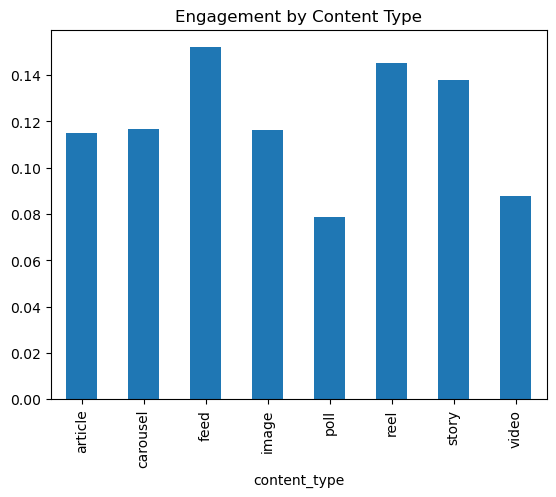

In [95]:
df.groupby("content_type")["engagement_rate"].mean().plot(kind="bar")
plt.title("Engagement by Content Type")
plt.show()


### Topic vs engagement

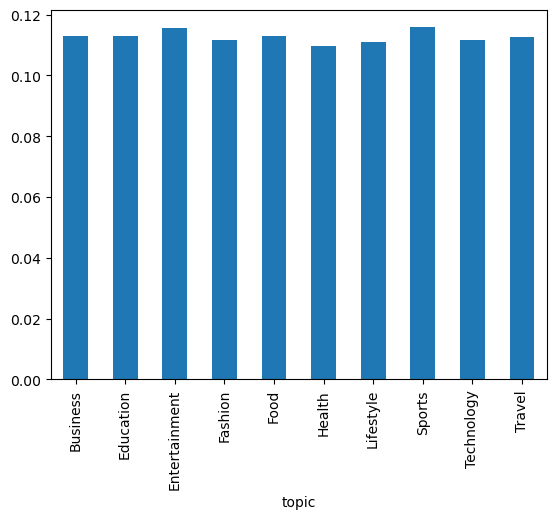

In [96]:
df.groupby("topic")["engagement_rate"].mean().plot(kind="bar")
plt.show()


### Sentiment vs engagement

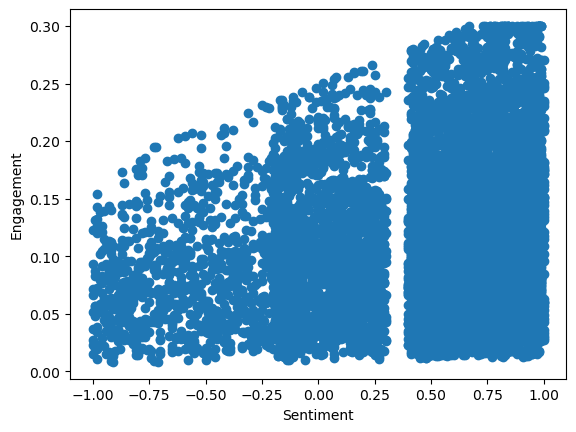

In [97]:
plt.scatter(df["sentiment_score"], df["engagement_rate"])
plt.xlabel("Sentiment")
plt.ylabel("Engagement")
plt.show()


### Views vs likes

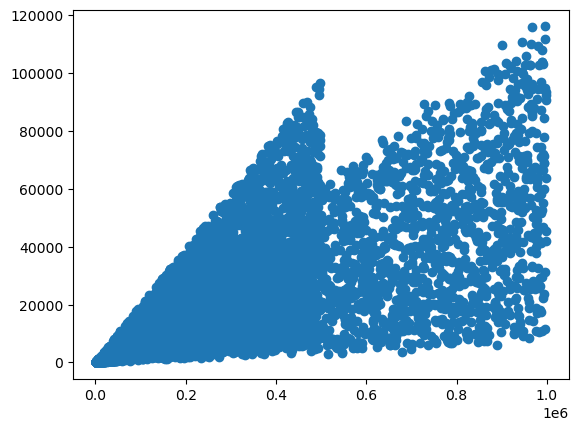

In [98]:
plt.scatter(df["views"], df["likes"])
plt.show()


In [100]:
import seaborn as sns

### Engagement by Content Type

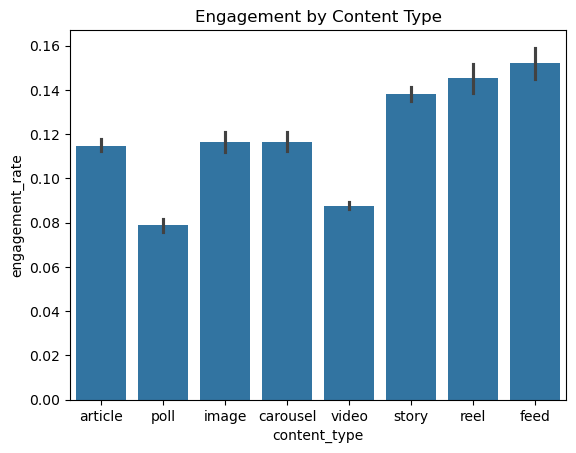

In [101]:
sns.barplot(x="content_type", y="engagement_rate", data=df)
plt.title("Engagement by Content Type")
plt.show()


### Engagement by Topic

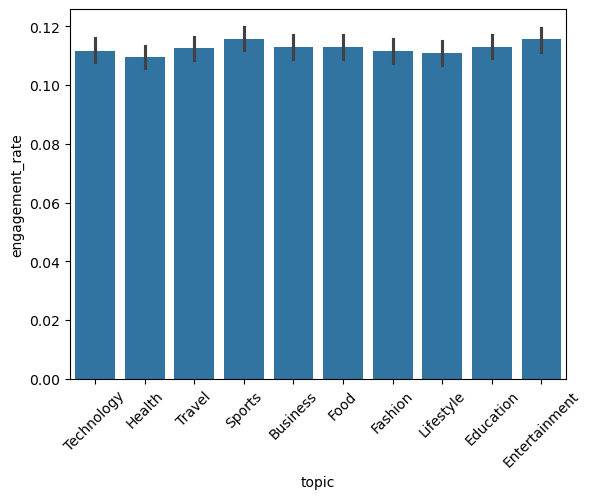

In [102]:
sns.barplot(x="topic", y="engagement_rate", data=df)
plt.xticks(rotation=45)
plt.show()


### Viral vs Non-viral posts

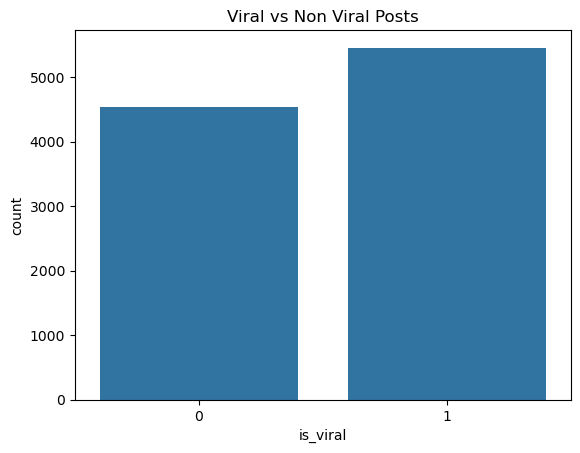

In [104]:
sns.countplot(x="is_viral", data=df)
plt.title("Viral vs Non Viral Posts")
plt.show()


### Sentiment vs Engagement 

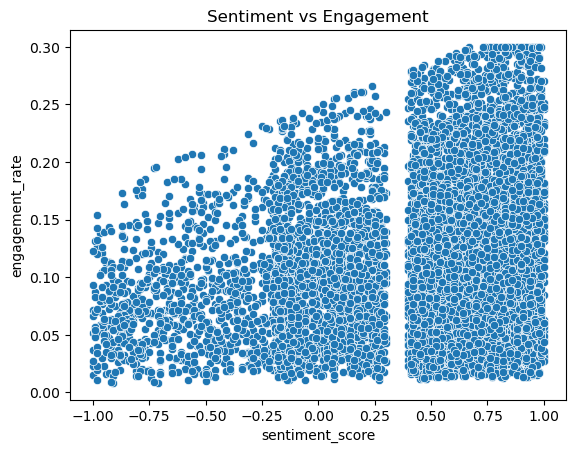

In [106]:
sns.scatterplot(x="sentiment_score", y="engagement_rate", data=df)
plt.title("Sentiment vs Engagement")
plt.show()


### Views vs Likes

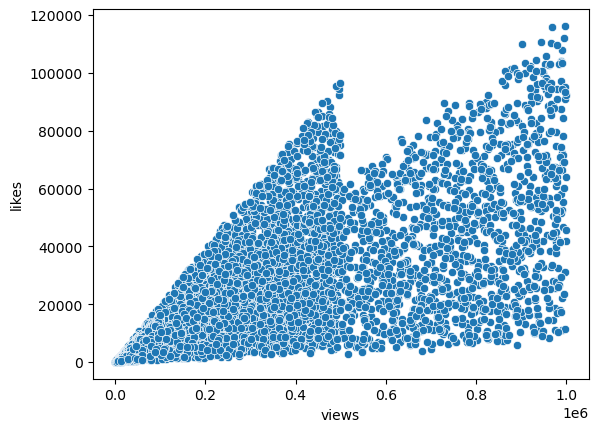

In [107]:
sns.scatterplot(x="views", y="likes", data=df)
plt.show()


### Heatmap

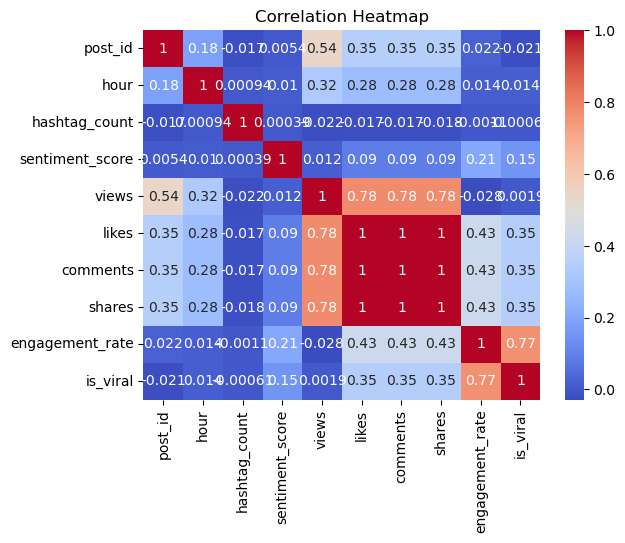

In [109]:
corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# =============================================================================
# 📊 KEY INSIGHTS FROM SOCIAL MEDIA DATA ANALYSIS
# =============================================================================

## Content Type Performance
### Poll and image-based posts generate higher engagement than article posts.
### This indicates that interactive and visual content attracts more audience
### attention and improves overall engagement.

## Topic-Based Engagement
### Business, health, and technology topics show strong engagement and higher
### chances of going viral. Informative and trending topics perform better
### than general content categories.

## Sentiment Impact on Engagement
### Posts with positive sentiment scores receive higher likes, shares, and
### engagement rates. Positive and motivational content improves audience
### interaction and overall reach.

## Hashtag Usage Effect
### Relevant hashtags increase reach and engagement, but excessive hashtags
### do not always guarantee better performance.
### Optimal use of 5–7 relevant hashtags provides the best engagement results.

## Posting Time Analysis
### Posts published during peak hours (especially evening time) receive higher
### engagement, while morning and late-night posts show lower interaction.

## Viral Post Patterns
### Viral posts generally have higher likes and shares, positive sentiment,
### strong topic relevance, and effective hashtag usage.
### These factors indicate that engagement and shareability drive virality.

## Platform Performance
### Some platforms generate significantly higher engagement and views.
### Businesses should focus more on high-performing platforms to maximize
### reach, audience interaction, and marketing effectiveness.
# =============================================================================


### 🏆 Business Recommendations

Focus more on visual and poll-based content

Post during high-engagement hours

Use positive and engaging captions

Use optimal number of hashtags

Create content around trending topics

Focus on platforms with highest engagement

These strategies can significantly improve social media reach and performance.